# Homework 3

## Problem 1

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
np.random.seed(42)

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = []
  labels = np.random.randint(2, size=m)

  for i in range(m):
    c = labels[i]
    n = np.random.normal(mu, sigma)

    x_1 = random.random()
    x_2 = w * x_1 + b + ((-1)**c) * n

    data.append([x_1, x_2])
  
  data = np.array(data)
  return data, labels

truth_weight = 20
truth_bias = 10
truth_mu = 20
truth_sigma = 6
truth_m = 10000
data, labels =  get_random_data(truth_weight, truth_bias, truth_mu, truth_sigma, truth_m)
print(data)
print(labels)

[[ 0.8289198  45.50278298]
 [ 0.74637981 44.99938751]
 [ 0.2866865  33.41636579]
 ...
 [ 0.20390283 30.48619685]
 [ 0.65963136 43.05662687]
 [ 0.1278556  -0.49581357]]
[0 0 0 ... 0 0 1]


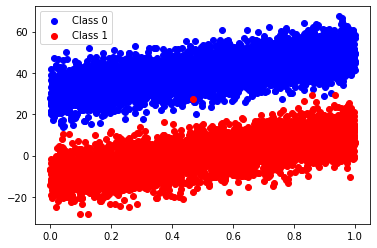

In [0]:
def display_random_data(data, labels):
    x_red = []
    y_red = []
    x_blue = []
    y_blue = []
    for i in range(len(labels)):
        if labels[i] == 0:
            x_blue.append(data[i][0])
            y_blue.append(data[i][1])
        else:
            x_red.append(data[i][0])
            y_red.append(data[i][1])
    plt.scatter(x_blue, y_blue, c='blue', label='Class 0')
    plt.scatter(x_red, y_red, c='red', label='Class 1')
    plt.legend()

display_random_data(data, labels)

In [0]:
training_data = data[:7999]
training_labels = labels[:7999]
testing_data = data[8000:]
testing_labels = labels[8000:]

## Problem 2

In [0]:
%tensorflow_version 2.x
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

In [0]:
input_dim = 2
output_dim = nb_classes = 1
batch_size = 128
epochs = 250

In [0]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testing_data, testing_labels))
score = model.evaluate(testing_data, testing_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [0]:
dense_layer = model.layers[0]
weights, bias = dense_layer.get_weights()

w_1 = weights[0]
w_2 = weights[1]
b_1 = bias

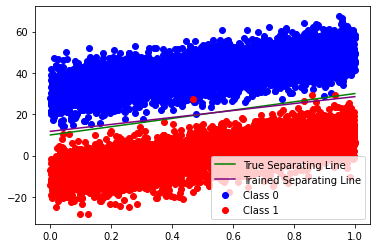

In [0]:
display_random_data(data, labels)
x_1 = np.linspace(0,1)
x_2_truth = x_1 * truth_weight + truth_bias
x_2_pred = x_1 * (-w_1/w_2) + (-b_1/w_2)
plt.plot(x_1, x_2_truth, c='green', label='True Separating Line')
plt.plot(x_1, x_2_pred, c='purple', label='Trained Separating Line')
plt.legend()

# Sources

- https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
- https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html
- https://stackoverflow.com/questions/30030659/in-python-what-is-the-difference-between-random-uniform-and-random-random
- https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
- https://medium.com/@the1ju/simple-logistic-regression-using-keras-249e0cc9a970
- https://stackoverflow.com/questions/43715047/how-do-i-get-the-weights-of-a-layer-in-keras
- 